## PROBLEM STATEMENT

Our company operates a diverse fleet of aircraft ranging from small business jets to medium-sized machines. We have been providing high-quality air transportation services to our clients for several years, and our primary focus is to ensure a safe, comfortable, and a convenient journey for our passengers. However, we are currently facing challenges due to several factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market resulting in increased labor costs. As a result, the company's profitability is under pressure, and they are seeking ways to address this issue. To tackle this challenge, they are looking to conduct an analysis of their database to find ways to increase their occupancy rate, which can help boost the average profit earned per seat.

## Objective

The goal of this project is to identify oppurtunities to increase the occupancy rate on the low-performing flights, which can ultimately lead to increased profitability for the airlines

## Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Database Connection

In [2]:
 #connecting to the database
connection = sqlite3.connect('travel.sqlite')

#cursor to execute queries
cursor = connection.cursor()

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of tables in the database')
table_list = [table[0] for table in cursor.fetchall()]
print(table_list)

List of tables in the database
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


## Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query("Select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data = pd.read_sql_query("Select * from airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [6]:
boarding_passes = pd.read_sql_query("Select * from boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
bookings = pd.read_sql_query("Select * from bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
flights = pd.read_sql_query("Select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
seats = pd.read_sql_query("Select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
ticket_flights = pd.read_sql_query("Select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [11]:
tickets = pd.read_sql_query("Select * from tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [12]:
# Checking the datatypes 
for table in table_list:
    print('\ntable: ',table)
    print(30*'--')
    column_info = connection.execute(f"PRAGMA table_info({table})")
    for column in column_info.fetchall():
        print(column[1:3])
   


table:  aircrafts_data
------------------------------------------------------------
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table:  airports_data
------------------------------------------------------------
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table:  boarding_passes
------------------------------------------------------------
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table:  bookings
------------------------------------------------------------
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table:  flights
------------------------------------------------------------
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departur

In [13]:
#checking for nulls

for table in table_list:
    print('\ntable: ',table)
    print(30*'--')
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


table:  aircrafts_data
------------------------------------------------------------
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
------------------------------------------------------------
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
------------------------------------------------------------
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
------------------------------------------------------------
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
------------------------------------------------------------
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

tab

## Basic Analysis

**How many planes have more than 100 seats?**

In [14]:
seats

pd.read_sql_query("""select aircraft_code, count(*) as no_of_seats from seats
                        group by aircraft_code
                        having no_of_seats > 100""", connection)


,aircraft_code,no_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


**How the number of tickets booked and total amount earned changed with time?**

For Tickets Booked:

In [15]:
# booked_tickets is a dataframe which is a result of join between the tickets and the bookings tables
booked_tickets = pd.read_sql_query(""" select * from tickets 
                    join bookings 
                    on tickets.book_ref = bookings.book_ref""", connection)

# Converting book_date from object datatype to datetime
booked_tickets['book_date'] = pd.to_datetime(booked_tickets['book_date'])
booked_tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

From the book_date column, we need to extract the date, so that we can group each day and analyze how many tickets were books and what was the total amount per day

In [16]:
booked_tickets['date'] = booked_tickets['book_date'].dt.date
booked_tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


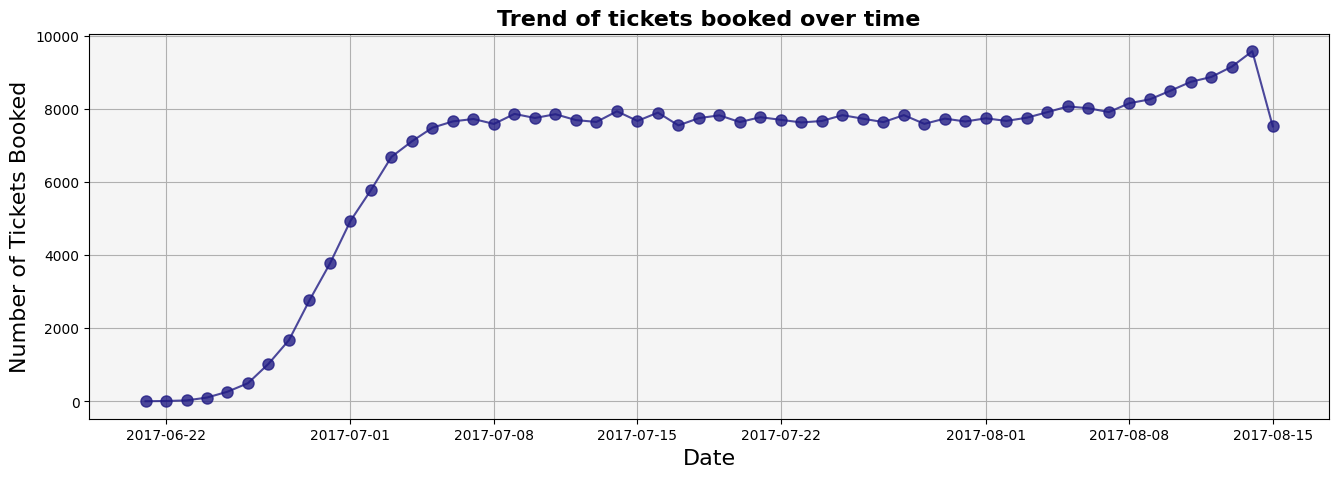

In [17]:
# Plotting line graph for Trend of tickets booked over time


#tickets_over_time is the dataframe after we grouped number of tickets according to date
tickets_over_time = booked_tickets.groupby('date')[['ticket_no']].count()  

plt.figure(figsize = (16,5))
plt.title('Trend of tickets booked over time',fontsize=16, fontweight='bold')

plt.plot(tickets_over_time.index, tickets_over_time['ticket_no'], marker = 'o',markersize=8,color='#211C84',alpha=0.8)

plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Tickets Booked',fontsize=16)
plt.grid()
plt.gca().set_facecolor('#f5f5f5')
plt.show()

For Total Amount:

In [18]:
booked_amount = pd.read_sql_query(""" select * from bookings """,connection)
booked_amount

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [19]:
# Converting book_date from object datatype to datetime
booked_amount['book_date'] = pd.to_datetime(booked_amount['book_date'])
booked_amount.dtypes

book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [20]:
#Extracting the date from book_date

booked_amount['date'] = booked_amount['book_date'].dt.date
booked_amount

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


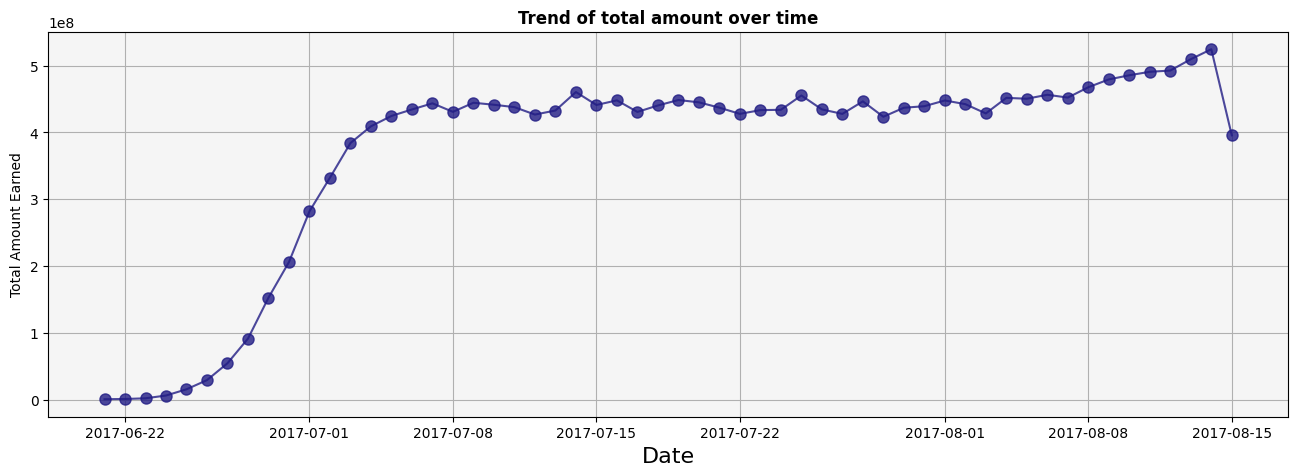

In [21]:
# Plotting line graph for Trend of total amount over time

amount_over_time = booked_amount.groupby('date')[['total_amount']].sum()  #amount_over_time is the dataframe after we grouped the total_amount according to date

plt.figure(figsize = (16,5))
plt.title('Trend of total amount over time', fontweight='bold')

plt.plot(amount_over_time.index, amount_over_time['total_amount'], marker = 'o',markersize=8,color='#211C84',alpha=0.8)

plt.xlabel('Date',fontsize=16)
plt.ylabel('Total Amount Earned')
plt.grid()
plt.gca().set_facecolor('#f5f5f5')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions**

In [22]:
df = pd.read_sql_query(""" select f.aircraft_code, tf.fare_conditions, avg(tf.amount) as Average_Charges
                            from ticket_flights as tf
                            join flights as f
                            on tf.flight_id = f.flight_id
                            group by f.aircraft_code, tf.fare_conditions""", connection)

df

,aircraft_code,fare_conditions,Average_Charges
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


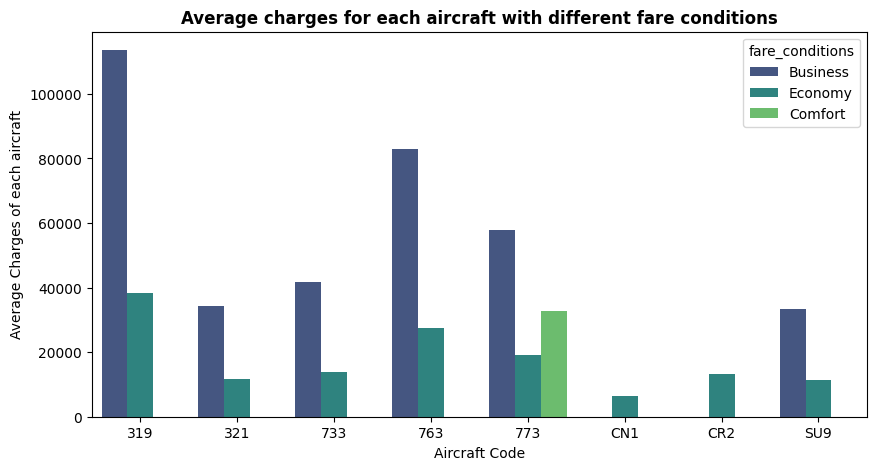

In [23]:
plt.figure(figsize=(10,5))
plt.title('Average charges for each aircraft with different fare conditions', fontweight='bold')
sns.barplot(x = 'aircraft_code',y = 'Average_Charges', hue = 'fare_conditions',data=df,palette = 'viridis')

plt.xlabel('Aircraft Code')
plt.ylabel('Average Charges of each aircraft')
plt.show()

## Analyzing Occupancy Rate

**For each aircraft, calculate the total revenue per year and the average revenue per ticket**

In [24]:
df1 = pd.read_sql_query("""select f.aircraft_code, SUM(tf.amount) as Total_Revenue,
                    count(tf.ticket_no) as Number_of_tickets,
                    (SUM(tf.amount) / COUNT(tf.ticket_no)) AS Average_revenue_per_ticket  
                     from flights as f
                     join ticket_flights as tf
                     on f.flight_id = tf.flight_id
                     group by f.aircraft_code""", connection)

df1

,aircraft_code,Total_Revenue,Number_of_tickets,Average_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


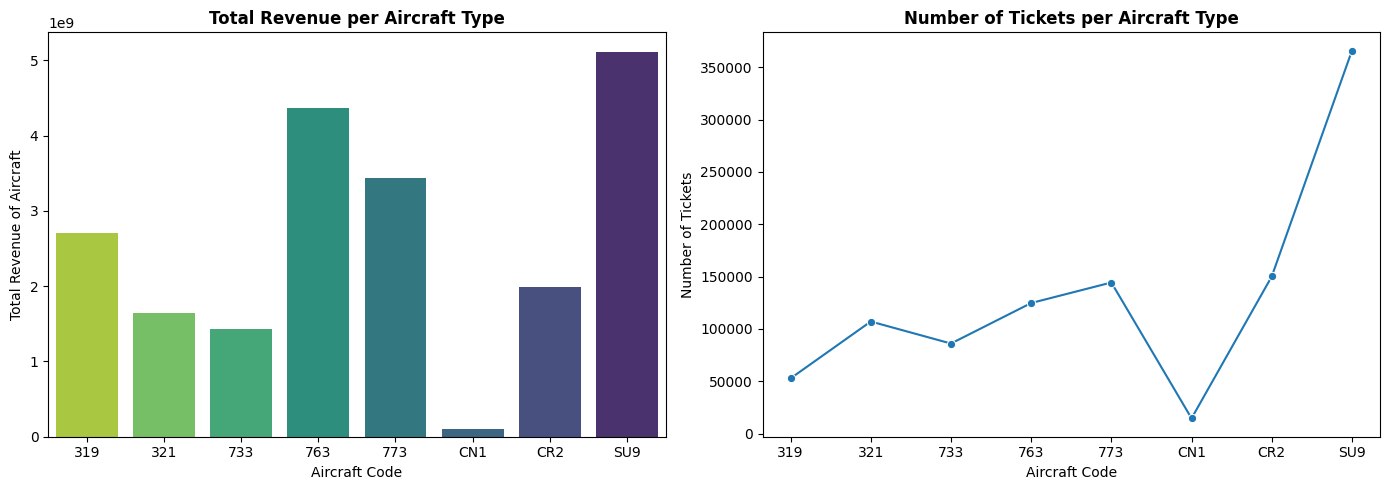

In [25]:
#Comparing total revenue and ticket volume side-by-side.

plt.figure(figsize=(14,5))

# Subplot 1: Bar plot of Total Revenue per Aircraft
plt.subplot(1,2,1)
sns.barplot(x = 'aircraft_code', y = 'Total_Revenue', data=df1, palette = 'viridis_r')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Revenue of Aircraft')
plt.title('Total Revenue per Aircraft Type', fontweight='bold')

# Subplot 2: Line plot of Number of Tickets per Aircraft
plt.subplot(1,2,2)
sns.lineplot(x='aircraft_code', y='Number_of_tickets', data=df1, marker='o', palette = 'viridis_r')
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets per Aircraft Type', fontweight='bold')

plt.tight_layout()
plt.show()

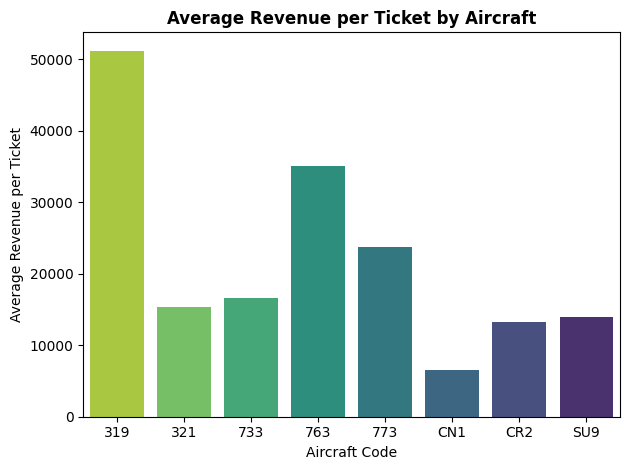

In [26]:
# which aircraft earns more per ticket.

sns.barplot(data=df1, x='aircraft_code', y='Average_revenue_per_ticket', palette = 'viridis_r')
plt.title("Average Revenue per Ticket by Aircraft",fontweight='bold')
plt.ylabel("Average Revenue per Ticket")
plt.xlabel("Aircraft Code")
plt.tight_layout()
plt.show()

**Ananlyzing the relation between the Average Booked Seats and Average Revenue Earned**

In [76]:

occ_rev_data = pd.read_sql_query("""select a.aircraft_code, avg(a.booked_seats_per_flight) Average_booked_seats, b.total_no_of_seats, avg(c.revenue_per_flight) Average_Revenue_Earned, d.total_revenue
                from (
                        select aircraft_code, flights.flight_id, count(*) as 'booked_seats_per_flight'
                        from boarding_passes
                        join flights on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code,flights.flight_id) a
                        
                        inner join
                        
                        (select aircraft_code, count(*) as 'total_no_of_seats'
                        from seats
                        group by aircraft_code) b
                        ON a.aircraft_code = b.aircraft_code
                        
                        inner join 
                        
                        (select flight_id, SUM(amount) as 'revenue_per_flight'
                        from ticket_flights
                        group by flight_id) c
                        ON a.flight_id = c.flight_id 

                        inner join
                        
                        (select aircraft_code, sum(amount) as 'total_revenue'
                        from flights
                        join ticket_flights
                        on flights.flight_id = ticket_flights.flight_id
                        group by aircraft_code) d
                        ON a.aircraft_code = d.aircraft_code 
                        
                        group by a.aircraft_code""",connection) 


occ_rev_data

,aircraft_code,Average_booked_seats,total_no_of_seats,Average_Revenue_Earned,total_revenue
0,319,53.58318098720292,116,2755966.1791590494,2706163100
1,321,88.80923076923077,170,1371182.1538461538,1638164100
2,733,80.25546218487395,130,1323837.142857143,1426552100
3,763,113.93729372937294,222,3964263.2013201322,4371277100
4,773,264.9258064516129,402,6307240.9677419355,3431205500
5,CN1,6.004431314623338,12,39724.29837518464,96373800
6,CR2,21.48284690220174,50,283348.54070660524,1982760500
7,SU9,56.81211267605634,97,798700.8169014085,5114484700


In [77]:
#Finding the correlation

correlation = occ_rev_data['Average_booked_seats'].corr(occ_rev_data['Average_Revenue_Earned'])
print(f"The correlation between Average Booked Seats and Average Revenue Earned is: {correlation}")

The correlation between Average Booked Seats and Average Revenue Earned is: 0.918944533097101


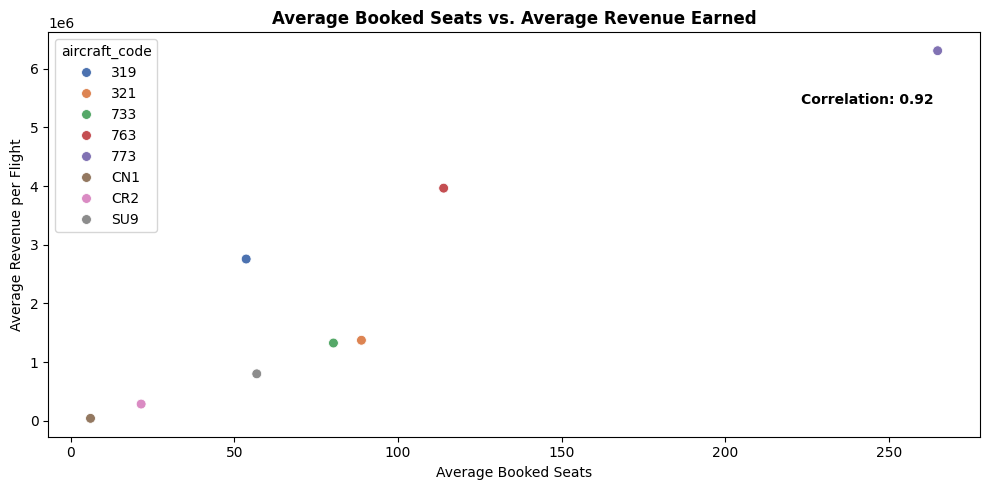

In [78]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=occ_rev_data, x='Average_booked_seats', y='Average_Revenue_Earned', hue='aircraft_code', s=50, palette = 'deep')
plt.title("Average Booked Seats vs. Average Revenue Earned", fontweight='bold')
plt.xlabel("Average Booked Seats")
plt.ylabel("Average Revenue per Flight")
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.95, 0.85), xycoords='axes fraction', ha='right', va='top',fontweight='bold')
plt.tight_layout()
plt.show()


**Calculate the average occupancy per aircraft**

In [27]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.booked_seats) as 'Average_booked_seats', b.total_no_of_seats, (avg(a.booked_seats)/b.total_no_of_seats) as Occupancy_Rate
                        from 
                        (
                        select aircraft_code, flights.flight_id, count(*) as 'booked_seats'
                        from boarding_passes
                        join flights on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code,flights.flight_id) a
                        
                        inner join
                        
                        (select aircraft_code, count(*) as 'total_no_of_seats'
                        from seats
                        group by aircraft_code) b 
                        ON a.aircraft_code = b.aircraft_code
                        
                        group by a.aircraft_code""", connection)

occupancy_rate

,aircraft_code,Average_booked_seats,total_no_of_seats,Occupancy_Rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


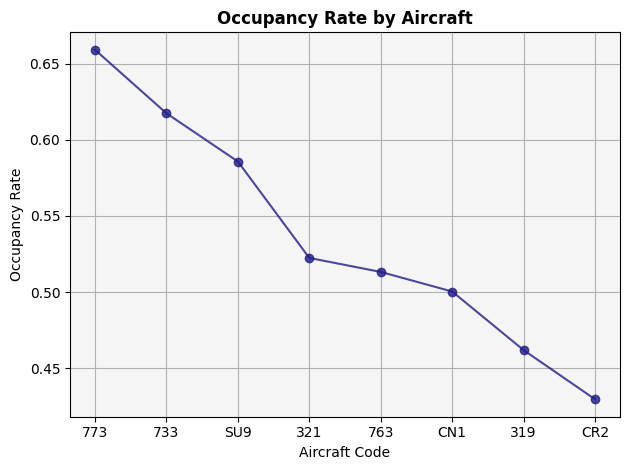

In [28]:
#Aircrafts Sorted by Occupancy Rate in a descending order

sorted_df = occupancy_rate.sort_values(by='Occupancy_Rate', ascending=False)

plt.plot(sorted_df['aircraft_code'], sorted_df['Occupancy_Rate'], marker='o', color='#211C84',alpha=0.8)
plt.title("Occupancy Rate by Aircraft", fontweight='bold')
plt.ylabel("Occupancy Rate")
plt.xlabel("Aircraft Code")
plt.tight_layout()
plt.grid()
plt.gca().set_facecolor('#f5f5f5')
plt.show()


**Calculate by how much the total annual turnover could increase by giving all aircrafts a 10% higher occupancy rate**

In [29]:
occupancy_rate['Increased_occupancy_rate'] = occupancy_rate['Occupancy_Rate'] + occupancy_rate['Occupancy_Rate']*0.1
occupancy_rate

,aircraft_code,Average_booked_seats,total_no_of_seats,Occupancy_Rate,Increased_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [30]:
pd.set_option("display.float_format",str)

In [31]:
Total_Revenue = pd.read_sql_query(""" select aircraft_code, sum(amount) as 'total_revenue'
                        from ticket_flights
                        join flights
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", connection)


occupancy_rate['Increased_Annual_Turnover'] = Total_Revenue['total_revenue']/occupancy_rate['Occupancy_Rate'] * occupancy_rate['Increased_occupancy_rate']

x = occupancy_rate['Annual_Turnover'] = Total_Revenue['total_revenue']
occupancy_rate.pop('Annual_Turnover')
occupancy_rate.insert(5,'Annual_Turnover', x)

occupancy_rate

,aircraft_code,Average_booked_seats,total_no_of_seats,Occupancy_Rate,Increased_occupancy_rate,Annual_Turnover,Increased_Annual_Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2706163100,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1638164100,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1426552100,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4371277100,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3431205500,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,96373800,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,1982760500,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5114484700,5625933169.999999


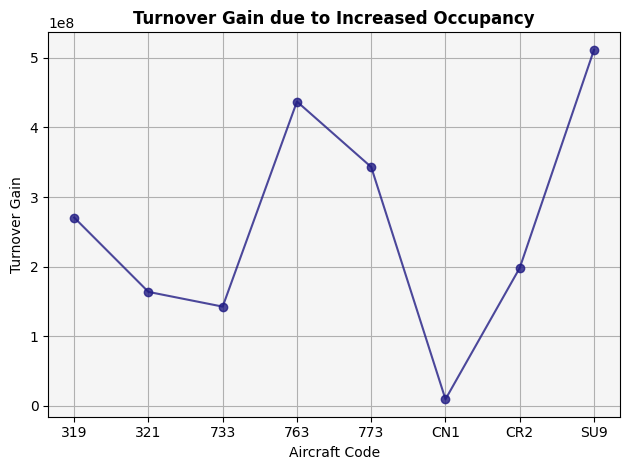

In [32]:
# The difference made by improved occupancy

occupancy_rate['Turnover_Gain'] = occupancy_rate['Increased_Annual_Turnover'] - occupancy_rate['Annual_Turnover']

plt.plot(occupancy_rate['aircraft_code'], occupancy_rate['Turnover_Gain'], marker='o', color='#211C84',alpha=0.8)
plt.title("Turnover Gain due to Increased Occupancy", fontweight='bold')
plt.ylabel("Turnover Gain")
plt.xlabel("Aircraft Code")
plt.grid(True)
plt.tight_layout()
plt.gca().set_facecolor('#f5f5f5')
plt.show()
